In [50]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt

## 1准备数据
数据集读入  
数据集乱序  
生成训练集和测试集（即x_train/y_train,x_test/y_test）  
配成（输入特征-标签）对，每次读入一笑撮（batch）

In [51]:
# 数据集读入
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
# 数据集乱序
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
# 生成训练集和测试集（即x_train/y_train,x_test/y_test）
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
# 数据类型转换
x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)
# 配成（输入特征-标签）对，每次读入一笑撮（batch）
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

## 2搭建网络
定义神经网络中所有可训练参数
## 3参数优化
嵌套循环迭代，with结构更新参数，显示当前loss

In [52]:
w1 = tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

In [53]:
lr = 0.1
train_loss_results = []  
test_acc = []
epoch = 500
loss_all = 9

In [54]:
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train,w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train,depth=3)
            loss = tf.reduce_mean(tf.square(y_-y))  #损失函数用均方误差
            loss_all +=loss.numpy() 
        #计算loss对各个参数的梯度
        grads = tape.gradient(loss,[w1,b1])
        
        #实现梯度更新w1 = w1 -lr*w1_grad  b = b - lr*b_grad
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
        
    #每个epoch打印loss
    print("Epoch{},loss:{}".format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)   #将4个step的loss求平均记录着此变量中
    loss_all = 0  #归零，为下一个epoch的loss做准备

# 4测试效果
# 计算当前参数前向传播后的准确率，显示当前acc
    total_correct,total_number = 0,0
    for x_test,y_test in test_db:
        y = tf.matmul(x_test,w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y,axis=1)  #返回y中最大值的索引，即预测的分类
        #将pred转换为y_test的数据类型
        pred = tf.cast(pred,dtype=y_test.dtype)
        #若分类正确，则correct=1,否则为0，将bool型的结果转化为int型
        correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        #将每个batch中的correct数加起来
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number +=x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:",acc)
    print("############################################")

Epoch0,loss:2.4496736638247967
Test_acc: 0.16666666666666666
############################################
Epoch1,loss:0.18773281201720238
Test_acc: 0.5333333333333333
############################################
Epoch2,loss:0.17744352295994759
Test_acc: 0.5333333333333333
############################################
Epoch3,loss:0.16831428185105324
Test_acc: 0.5333333333333333
############################################
Epoch4,loss:0.1604229435324669
Test_acc: 0.5333333333333333
############################################
Epoch5,loss:0.15368586406111717
Test_acc: 0.5333333333333333
############################################
Epoch6,loss:0.14795001968741417
Test_acc: 0.5333333333333333
############################################
Epoch7,loss:0.1430513896048069
Test_acc: 0.5333333333333333
############################################
Epoch8,loss:0.13884079828858376
Test_acc: 0.5333333333333333
############################################
Epoch9,loss:0.13519200310111046
Test_acc: 0.5333

Test_acc: 0.7666666666666667
############################################
Epoch88,loss:0.07280316483229399
Test_acc: 0.7666666666666667
############################################
Epoch89,loss:0.07245059870183468
Test_acc: 0.7666666666666667
############################################
Epoch90,loss:0.07210187520831823
Test_acc: 0.7666666666666667
############################################
Epoch91,loss:0.07175694685429335
Test_acc: 0.7666666666666667
############################################
Epoch92,loss:0.07141576800495386
Test_acc: 0.8
############################################
Epoch93,loss:0.07107828091830015
Test_acc: 0.8
############################################
Epoch94,loss:0.07074443716555834
Test_acc: 0.8
############################################
Epoch95,loss:0.07041418831795454
Test_acc: 0.8333333333333334
############################################
Epoch96,loss:0.07008748967200518
Test_acc: 0.8333333333333334
############################################
Epoch97,

Epoch171,loss:0.053040891885757446
Test_acc: 0.9333333333333333
############################################
Epoch172,loss:0.05288548115640879
Test_acc: 0.9333333333333333
############################################
Epoch173,loss:0.0527314068749547
Test_acc: 0.9333333333333333
############################################
Epoch174,loss:0.05257866531610489
Test_acc: 0.9333333333333333
############################################
Epoch175,loss:0.05242722947150469
Test_acc: 0.9333333333333333
############################################
Epoch176,loss:0.05227707605808973
Test_acc: 0.9666666666666667
############################################
Epoch177,loss:0.052128205075860023
Test_acc: 0.9666666666666667
############################################
Epoch178,loss:0.051980601623654366
Test_acc: 0.9666666666666667
############################################
Epoch179,loss:0.05183424148708582
Test_acc: 0.9666666666666667
############################################
Epoch180,loss:0.0516891106

Epoch255,loss:0.043477470986545086
Test_acc: 1.0
############################################
Epoch256,loss:0.04339500330388546
Test_acc: 1.0
############################################
Epoch257,loss:0.04331306554377079
Test_acc: 1.0
############################################
Epoch258,loss:0.043231663294136524
Test_acc: 1.0
############################################
Epoch259,loss:0.043150792829692364
Test_acc: 1.0
############################################
Epoch260,loss:0.043070437386631966
Test_acc: 1.0
############################################
Epoch261,loss:0.04299060069024563
Test_acc: 1.0
############################################
Epoch262,loss:0.042911275289952755
Test_acc: 1.0
############################################
Epoch263,loss:0.04283245839178562
Test_acc: 1.0
############################################
Epoch264,loss:0.042754145339131355
Test_acc: 1.0
############################################
Epoch265,loss:0.04267632681876421
Test_acc: 1.0
################

Test_acc: 1.0
############################################
Epoch345,loss:0.037727242801338434
Test_acc: 1.0
############################################
Epoch346,loss:0.03767801774665713
Test_acc: 1.0
############################################
Epoch347,loss:0.03762903297320008
Test_acc: 1.0
############################################
Epoch348,loss:0.03758029779419303
Test_acc: 1.0
############################################
Epoch349,loss:0.03753180196508765
Test_acc: 1.0
############################################
Epoch350,loss:0.03748355619609356
Test_acc: 1.0
############################################
Epoch351,loss:0.037435546051710844
Test_acc: 1.0
############################################
Epoch352,loss:0.03738777292892337
Test_acc: 1.0
############################################
Epoch353,loss:0.03734023543074727
Test_acc: 1.0
############################################
Epoch354,loss:0.03729293355718255
Test_acc: 1.0
############################################
Epoch355,

Epoch437,loss:0.0340391262434423
Test_acc: 1.0
############################################
Epoch438,loss:0.034006587229669094
Test_acc: 1.0
############################################
Epoch439,loss:0.03397418977692723
Test_acc: 1.0
############################################
Epoch440,loss:0.03394191525876522
Test_acc: 1.0
############################################
Epoch441,loss:0.03390977391973138
Test_acc: 1.0
############################################
Epoch442,loss:0.03387776389718056
Test_acc: 1.0
############################################
Epoch443,loss:0.03384588425979018
Test_acc: 1.0
############################################
Epoch444,loss:0.03381411451846361
Test_acc: 1.0
############################################
Epoch445,loss:0.03378248680382967
Test_acc: 1.0
############################################
Epoch446,loss:0.03375098016113043
Test_acc: 1.0
############################################
Epoch447,loss:0.03371959878131747
Test_acc: 1.0
######################

## 5acc/loss可视化

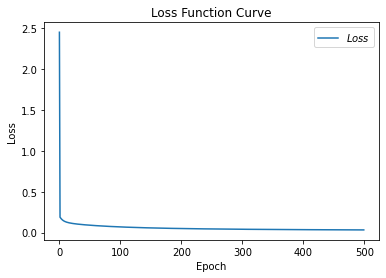

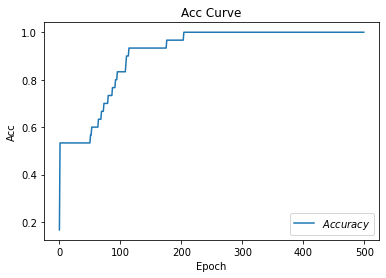

In [56]:
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results,label="$Loss$")
plt.legend()
plt.show()

plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc,label="$Accuracy$")
plt.legend()
plt.show()